## 日本語版注釈

Google Colaboratoryで動作させるように変更しています。

Jupyter Notebookで実行する場合は該当の部分のコメントアウトを変更してください。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/DataScience/PyTorch/deep-learning-with-pytorch/p1ch2

Mounted at /content/drive
/content/drive/MyDrive/DataScience/PyTorch/deep-learning-with-pytorch/p1ch2


dir(models) について
- 大文字（AlexNet）は一般的なアーキテクチャーを実装したクラス
- 小文字（resnet101）はあらかじめ定義されたモデルをインスタンス化する関数で、オプションで訓練済みの重みをロード出来る
  - resnet101は、101層のResNetのインスタンスを返す
  - resnet18は、18層のResNetのインスタンスを返す

In [2]:
from torchvision import models

# torchvisionの全ての属性 (メソッドやプロパティ) を見る
print(dir(models))

# AlexNetクラスのインスタンスを作成（後続の処理には関係しない）
alexnet = models.AlexNet()

# ResNet クラスのインスタンスを作成し、訓練済み重みをロードする
resnet = models.resnet101(pretrained=True)

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

訓練済みモデルを利用する場合、ネットワークの訓練中の前処理と同じ内容にする必要がある

In [7]:
# 前処理
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256), # 256x256に拡大縮小
        transforms.CenterCrop(224), # 画像中央を中心に224x224にクロップ（切り取り）
        transforms.ToTensor(), # テンソル変換（色高さ幅の3次元）
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )] # RGB成分を標準化
        )

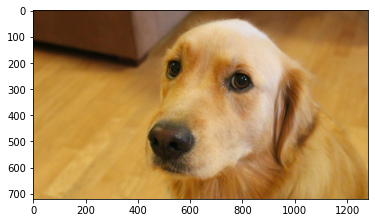

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("../data/p1ch2/bobby.jpg")
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


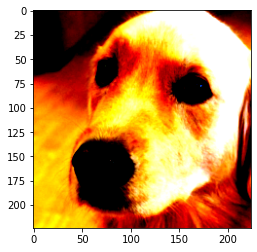

In [39]:
# 前処理
img_t = preprocess(img)
plt.imshow(img_t.permute(1,2,0)) # permute は numpy.transposeと同じ

evalについて
- evalution の略
    - 訓練済みモデルで新しいデータを処理する順伝搬のプロセスは推論(inference)と呼ばれる
    - 推論を行うにはeval mode にする
- [【PyTorch】地味に知っておくべき実装の躓きドコロ \- HELLO CYBERNETICS](https://www.hellocybernetics.tech/entry/2018/02/20/182906)
```
PyTorchではmodel.train()やmodel.eval()によって、
モデルのモードを切り替えますが、
これらのメソッドによってドロップアウトを行うか否かを自動で切り替えてくれるのは
ドロップアウトクラス（torch.nn.Dropout）の方です。
torch.nn.functional.dropoutの方は、model.eval()などが働きません。
関数の引数でtorch.nn.functional.dropout(training=False)などとしなければならないのです。
```

In [32]:
import torch

# バッチ化
batch_t = torch.unsqueeze(img_t, 0)

# 推論モードに切り替え、実行
resnet.eval()
out = resnet(batch_t)

print(out.shape)
print(out[0, :100])

torch.Size([1, 1000])
tensor([-3.4803, -1.6618, -2.4515, -3.2662, -3.2466, -1.3611, -2.0465, -2.5112,
        -1.3043, -2.8900, -1.6862, -1.3055, -2.6129, -2.9645, -2.4300, -2.8143,
        -3.3019, -0.7940, -0.6518, -1.2308, -3.0193, -3.9457, -2.2675, -1.0811,
        -1.0232, -1.0442, -3.0918, -2.4613, -2.1964, -3.2354, -3.3013, -1.8553,
        -2.0921, -2.1327, -1.9102, -3.2403, -1.1396, -1.0925, -1.2186, -0.9333,
        -0.4509, -1.5489,  1.4161,  0.1087, -1.8442, -1.4806,  0.9623, -0.9946,
        -3.0060, -2.7384, -2.5798, -2.0666, -1.8022, -1.9328, -1.7726, -1.3041,
        -0.4585, -2.0537, -3.2804, -0.5045, -0.3817, -1.1147, -0.7400, -1.4299,
        -1.4883, -2.1073, -1.7373, -0.4041, -1.9374, -1.4862, -1.2102, -1.3223,
        -1.0832,  0.0792, -0.4134, -0.2748, -0.8540,  0.6036, -0.8920,  1.4761,
        -2.6427, -3.6478, -0.2707, -0.1236, -2.2445, -2.3425, -1.4430,  0.2526,
        -1.0588, -2.8812, -2.5145, -2.2579,  0.4165, -1.3463, -0.0164, -2.8798,
        -0.5566, -

In [36]:
# GitHubのリポジトリから実行の場合
with open('../data/p1ch2/imagenet_classes.txt') as f:
   labels = [line.strip() for line in f.readlines()]

print('labels len:', len(labels))
print('labels sample:', labels[:10])

# softmaxで[0,1]へ正規化（信頼度へ変換）
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

# best5 表示
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

labels len: 1000
labels sample: ['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus']


[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.808121681213379),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267431259155273),
 ('redbone', 0.20863044261932373),
 ('tennis ball', 0.11621593683958054)]

結果の解釈
- 1-4は犬種
- 5番目にテニスボール
    - 0.1%の確率でテニスボールが何かを誤解している
    - データの中にバイアス混入していた可能性を示す

訓練済みモデルの性能について
- 訓練時の訓練セットに対象クラスのデータが十分に含まれているかに依存する
- 訓練セットに含まれていない画像を推論すると、高い確信度でも間違ったクラスを推論してしまう